<a href="https://colab.research.google.com/github/sameet96/fault_detection_image_processing/blob/main/Fault_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
Datasets = '/content/drive/MyDrive/Fault detection Image processing/data-20230506T211359Z-001/data'
train_path = f'{Datasets}/train'
test_path = f'{Datasets}/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
  # useful for getting number of output classes
folders = glob(f'{train_path}/*')
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [8]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-8-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 602s 10s/step - loss: 2.8312 - accuracy: 0.7196 - val_loss: 0.0717 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 39s 645ms/step - loss: 0.6477 - accuracy: 0.8739 - val_loss: 0.6416 - val_accuracy: 0.7778
Epoch 3/20
61/61 [==============================] - 39s 646ms/step - loss: 0.4419 - accuracy: 0.9231 - val_loss: 0.0521 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 39s 643ms/step - loss: 0.4456 - accuracy: 0.9206 - val_loss: 0.0530 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 39s 635ms/step - loss: 0.4031 - accuracy: 0.9308 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 39s 641ms/step - loss: 0.4491 - accuracy: 0.9262 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 39s 639ms/step - loss: 0.4251 - accuracy: 0.9431 - val_loss: 0.6981 - val_accuracy: 0.8889


In [9]:
import matplotlib.pyplot as plt


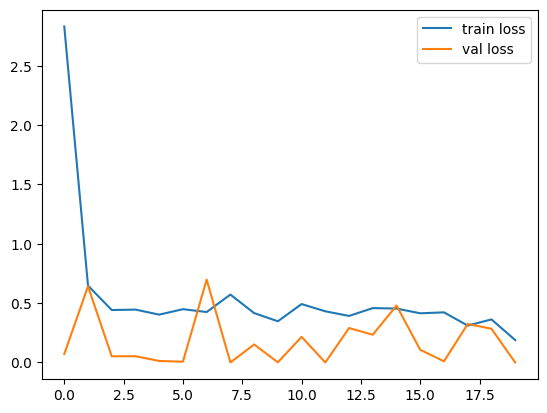

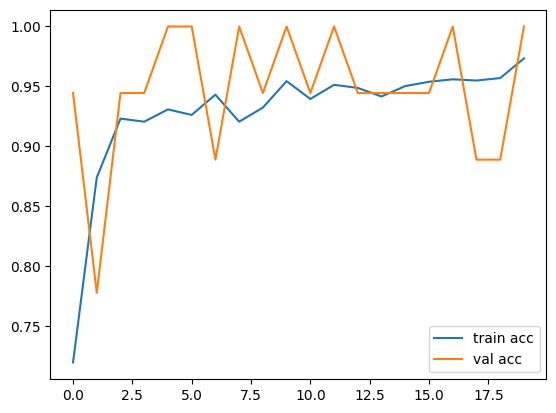

<Figure size 640x480 with 0 Axes>

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')